In [1]:
import os
import pandas as pd

In [2]:
import param

In [6]:
#!echo $param.count_out_dir

In [7]:
#!time ls -lat $param.count_out_dir > ./.ls.count_out_dir

8.55user 72.98system 7:33.77elapsed 17%CPU (0avgtext+0avgdata 259408maxresident)k
0inputs+162784outputs (0major+42912minor)pagefaults 0swaps


In [10]:
!ls -alth | head

total 14M
drwxr-xr-x 5 btsui users   17 Oct 29 09:23 .
-rw-r--r-- 1 btsui users 1.7K Oct 29 09:23 RemoveFailedRuns.ipynb
-rw-r--r-- 1 btsui users  80M Oct 29 09:23 .ls.count_out_dir
drwxr-xr-x 2 btsui users    5 Oct 29 09:14 .ipynb_checkpoints
drwxr-xr-x 2 btsui users    3 Oct 29 09:13 __pycache__
-rw-r--r-- 1 btsui users  14K Oct 28 21:23 calculate_unprocessed.ipynb
-rw-r--r-- 1 btsui users 5.8K Oct 28 20:55 single_snp.py
-rw-r--r-- 1 btsui users  575 Oct 28 19:54 run_one.py
-rw-r--r-- 1 btsui users 6.2K Oct 28 19:16 RunAll.ipynb


In [3]:
tmpDf=pd.read_csv('./.ls.count_out_dir',sep='\s+').reset_index()

/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#tmpDf.columns=['','']

In [5]:
tmpDf.columns=['','','','','Size','Month','Day','Time','Fname']

In [6]:
tmpDf_sub=tmpDf[tmpDf.Fname.str.contains('.txt.snp.gz$')]

In [45]:
#tmpDf_sub

In [43]:
tmpDf_sub.groupby('Month')['Size'].median()

Month
Aug        169.0
Dec     390907.0
Feb    4658891.0
Jan    1166352.5
Jul    5644942.0
Mar        440.0
Oct         20.0
Name: Size, dtype: float64

In [51]:
%matplotlib inline
import numpy as np

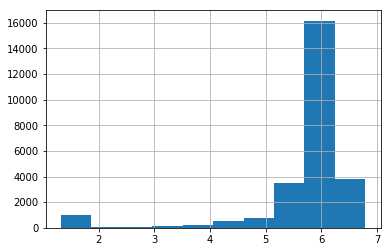

In [52]:
np.log10(tmpDf_sub[(tmpDf_sub.Month=='Oct')&(tmpDf_sub.Day>=28)].Size+1).hist()

In [ ]:
#most of the new ones are successfuly in mapping

In [7]:
removeFnames=list(tmpDf_sub[tmpDf_sub.Size<=20].Fname.values)

In [14]:
def removeF(Fname):
    returnStatus=os.system('rm {count_out_dir}/{Fname}'.format(count_out_dir=param.count_out_dir,Fname=Fname))
    return (returnStatus)
    

In [15]:
from multiprocessing import Pool

In [16]:
from tqdm import tqdm

In [17]:
#removeFnames

In [18]:
#remove()    
with Pool(4) as p:
    returnStatus=list(
        tqdm(
        p.imap(removeF,removeFnames)
    ,total=len(removeFnames)
    ))


  1%|          | 2162/190319 [00:15<22:30, 139.36it/s]


  2%|▏         | 4402/190319 [00:31<21:54, 141.48it/s]


  3%|▎         | 6615/190319 [00:47<21:49, 140.25it/s]


  5%|▍         | 8866/190319 [01:02<21:26, 141.02it/s]


  6%|▌         | 11092/190319 [01:18<21:03, 141.87it/s]


  7%|▋         | 13322/190319 [01:33<20:38, 142.91it/s]


  8%|▊         | 15493/190319 [01:48<20:26, 142.57it/s]


  9%|▉         | 17719/190319 [02:03<20:07, 142.90it/s]


 10%|█         | 19937/190319 [02:19<19:49, 143.25it/s]


 12%|█▏        | 22151/190319 [02:34<19:30, 143.63it/s]


 13%|█▎        | 24391/190319 [02:49<19:11, 144.15it/s]


 14%|█▍        | 26598/190319 [03:04<18:55, 144.18it/s]


 15%|█▌        | 28839/190319 [03:19<18:37, 144.54it/s]


 16%|█▋        | 31073/190319 [03:34<18:19, 144.78it/s]


 18%|█▊        | 33318/190319 [03:49<18:01, 145.11it/s]


 19%|█▊        | 35557/190319 [04:04<17:44, 145.43it/s]


 20%|█▉        | 37798/190319 [04:19<17:27, 145.61it/s]


 21%|██        | 40031/190319 [04:34<17:12, 145.62it/s]


 22%|██▏       | 42264/190319 [04:49<16:55, 145.76it/s]


 23%|██▎       | 44493/190319 [05:05<16:41, 145.63it/s]


 25%|██▍       | 46718/190319 [05:20<16:26, 145.60it/s]


 26%|██▌       | 48938/190319 [05:35<16:09, 145.77it/s]


 27%|██▋       | 51148/190319 [05:51<15:55, 145.71it/s]


 28%|██▊       | 53399/190319 [06:06<15:40, 145.61it/s]


 29%|██▉       | 55629/190319 [06:21<15:23, 145.79it/s]


 30%|███       | 57870/190319 [06:36<15:08, 145.85it/s]


 32%|███▏      | 60121/190319 [06:51<14:51, 146.00it/s]


 33%|███▎      | 62357/190319 [07:06<14:35, 146.08it/s]


 34%|███▍      | 64598/190319 [07:22<14:20, 146.12it/s]


 35%|███▌      | 66840/190319 [07:37<14:04, 146.26it/s]


 36%|███▋      | 69203/190319 [07:52<13:46, 146.59it/s]


 38%|███▊      | 71599/190319 [08:07<13:28, 146.90it/s]


 39%|███▉      | 73958/190319 [08:22<13:10, 147.20it/s]


 40%|████      | 76335/190319 [08:37<12:52, 147.49it/s]


 41%|████▏     | 78667/190319 [08:52<12:36, 147.62it/s]


 43%|████▎     | 81059/190319 [09:08<12:19, 147.81it/s]


 44%|████▍     | 83454/190319 [09:23<12:01, 148.12it/s]


 45%|████▌     | 85818/190319 [09:38<11:44, 148.34it/s]


 46%|████▋     | 88163/190319 [09:53<11:27, 148.50it/s]


 48%|████▊     | 90489/190319 [10:08<11:11, 148.62it/s]


 49%|████▉     | 92846/190319 [10:23<10:54, 148.82it/s]


 50%|█████     | 95236/190319 [10:39<10:38, 149.01it/s]


 51%|█████▏    | 97605/190319 [10:54<10:21, 149.12it/s]


 53%|█████▎    | 99925/190319 [11:09<10:05, 149.27it/s]


 54%|█████▎    | 102238/190319 [11:24<09:49, 149.44it/s]


 55%|█████▍    | 104551/190319 [11:38<09:33, 149.59it/s]


 56%|█████▌    | 106796/190319 [11:53<09:18, 149.58it/s]


 57%|█████▋    | 109091/190319 [12:09<09:02, 149.61it/s]


 59%|█████▊    | 111387/190319 [12:23<08:47, 149.72it/s]


 60%|█████▉    | 113631/190319 [12:39<08:32, 149.70it/s]


 61%|██████    | 115940/190319 [12:53<08:16, 149.79it/s]


 62%|██████▏   | 118289/190319 [13:08<08:00, 149.93it/s]


 63%|██████▎   | 120610/190319 [13:24<07:44, 150.00it/s]


 65%|██████▍   | 122932/190319 [13:38<07:28, 150.13it/s]


 66%|██████▌   | 125212/190319 [13:53<07:13, 150.20it/s]


 67%|██████▋   | 127509/190319 [14:08<06:57, 150.31it/s]


 68%|██████▊   | 129794/190319 [14:23<06:42, 150.35it/s]


 69%|██████▉   | 132160/190319 [14:38<06:26, 150.44it/s]


 71%|███████   | 134490/190319 [14:53<06:10, 150.55it/s]


 72%|███████▏  | 136794/190319 [15:08<05:55, 150.62it/s]


 73%|███████▎  | 139121/190319 [15:23<05:39, 150.70it/s]


 74%|███████▍  | 141413/190319 [15:38<05:24, 150.74it/s]


 76%|███████▌  | 143709/190319 [15:53<05:09, 150.75it/s]


 77%|███████▋  | 146008/190319 [16:08<04:53, 150.80it/s]


 78%|███████▊  | 148269/190319 [16:23<04:38, 150.78it/s]


 79%|███████▉  | 150490/190319 [16:38<04:24, 150.71it/s]


 80%|████████  | 152781/190319 [16:53<04:08, 150.76it/s]


 82%|████████▏ | 155111/190319 [17:08<03:53, 150.82it/s]


 83%|████████▎ | 157388/190319 [17:23<03:38, 150.86it/s]


 84%|████████▍ | 159685/190319 [17:38<03:22, 150.91it/s]


 85%|████████▌ | 161977/190319 [17:52<03:07, 150.96it/s]


 86%|████████▋ | 164258/190319 [18:08<02:52, 150.96it/s]


 88%|████████▊ | 166580/190319 [18:23<02:37, 150.96it/s]


 89%|████████▊ | 168867/190319 [18:38<02:22, 150.99it/s]


 90%|████████▉ | 171171/190319 [18:53<02:06, 151.04it/s]


 91%|█████████ | 173519/190319 [19:08<01:51, 151.13it/s]


 92%|█████████▏| 175816/190319 [19:23<01:35, 151.13it/s]


 94%|█████████▎| 178091/190319 [19:38<01:20, 151.14it/s]


 95%|█████████▍| 180411/190319 [19:53<01:05, 151.19it/s]


 96%|█████████▌| 182684/190319 [20:08<00:50, 151.17it/s]


 97%|█████████▋| 184977/190319 [20:23<00:35, 151.21it/s]


 98%|█████████▊| 187270/190319 [20:38<00:20, 151.18it/s]


100%|█████████▉| 189503/190319 [20:54<00:05, 151.11it/s]


100%|██████████| 190319/190319 [20:59<00:00, 151.13it/s]

In [11]:
removeFnames

['SRR545820.txt.snp.gz',
 'SRR3729884.txt.snp.gz',
 'SRR5197400.txt.snp.gz',
 'SRR1650036.txt.snp.gz',
 'SRR1060250.txt.snp.gz',
 'SRR1060251.txt.snp.gz',
 'SRR5061997.txt.snp.gz',
 'SRR1721466.txt.snp.gz',
 'SRR1649970.txt.snp.gz',
 'SRR1721428.txt.snp.gz',
 'SRR5076306.txt.snp.gz',
 'SRR5506891.txt.snp.gz',
 'SRR1652360.txt.snp.gz',
 'SRR5076063.txt.snp.gz',
 'SRR5076006.txt.snp.gz',
 'SRR4031881.txt.snp.gz',
 'SRR1919452.txt.snp.gz',
 'SRR4031859.txt.snp.gz',
 'SRR4031825.txt.snp.gz',
 'SRR2641567.txt.snp.gz',
 'SRR5076238.txt.snp.gz',
 'SRR545810.txt.snp.gz',
 'SRR5822908.txt.snp.gz',
 'SRR955319.txt.snp.gz',
 'SRR5452164.txt.snp.gz',
 'SRR4381813.txt.snp.gz',
 'ERR1697407.txt.snp.gz',
 'SRR5452187.txt.snp.gz',
 'SRR1986535.txt.snp.gz',
 'SRR1721462.txt.snp.gz',
 'SRR5452158.txt.snp.gz',
 'SRR545812.txt.snp.gz',
 'ERR1199485.txt.snp.gz',
 'SRR7286142.txt.snp.gz',
 'SRR1721458.txt.snp.gz',
 'SRR4381713.txt.snp.gz',
 'SRR5172802.txt.snp.gz',
 'SRR3145785.txt.snp.gz',
 'SRR3535217.txt